# Data Augmentation

This notebook demonstrates the data augmentation capabilities of the `AudioDataGenerator` class in modules/data_preprocessin.py

In data augmentation the audio file get augmented in the following steps. 

It carries out data augmentations with the following steps:
1. Mean Centering and Normalization: Audio data is mean-centered and normalized to fall within
    the range of [-1, 1].
2. Random Shifting: The voice command is randomly shifted either to the right or left without
truncating the audio.
3. Background Noise Sampling: A random one-second sample from the background noise is
selected.
4. Mean Centering and Normalization of Background Noise: The background noise sample is meancentered and normalized.
5. Scaling and Addition: Background noise is scaled to a range of [0, 0.1] and added to the
normalized audio data from step 2.

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow import keras
import seaborn as sns 
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

#from local package 
from modules.data_preprocessing import AudioDataGenerator
from modules.utils import _create_melspec

## Constants

In [6]:
TARGET_WORD='marvin'
BACKGROUND_WORD="background"
SEED= 32423453
SPEECH_DATA='audio_data'
NOISE_FLOOR=0.1
BACKGROUND_VOL=0.2
keras.utils.set_random_seed(SEED)

## Loading files 

In [7]:
#extacting split dataset filenames
import pickle
with open('data/dict_split.pkl', 'rb') as handle:
    split_data = pickle.load(handle)


def list_subfolders(folder_path):
    subfolders = [f.path[len(folder_path)+1:] for f in os.scandir(folder_path) if f.is_dir()]
    return subfolders

words = list_subfolders(SPEECH_DATA)
classes=[word for word in words if "_" not in word]

#initialize the audio data generator
datagen=AudioDataGenerator(filenames=split_data['train'],
                           classes=classes,
                           data_folder=SPEECH_DATA,
                           noise_floor=NOISE_FLOOR,
                           target=TARGET_WORD,
                           batch_size=311,
                           training=True,
                           augment=True,
                           background_volume=BACKGROUND_VOL)

## Plotting 

### Data augmented audio files

Text(0.5, 0.03, 'Time in seconds')

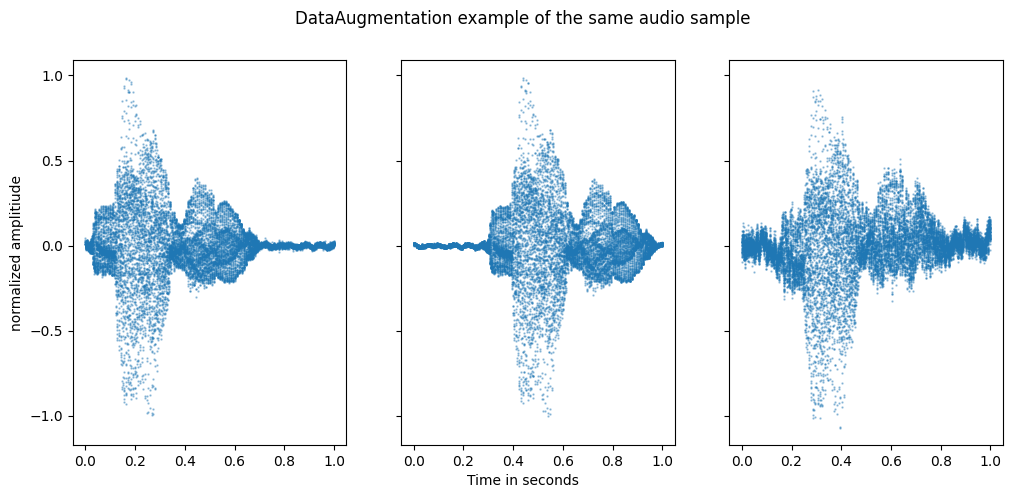

In [8]:
sample_audio_path='audio_data/marvin/0a9f9af7_nohash_1.wav'
fig,axes=plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,5))
fig.suptitle('DataAugmentation example of the same audio sample')
s=0.5
a=0.4
np.random.seed(5464)
audio_data=datagen._process_audio(sample_audio_path)
axes[0].scatter(np.arange(16000)/16000,audio_data.numpy().flatten(),s=s,alpha=a)
axes[0].set_ylabel('normalized amplitiude')

np.random.seed(534)
audio_data=datagen._process_audio(sample_audio_path)

axes[1].scatter(np.arange(16000)/16000,audio_data.numpy().flatten(),s=s,alpha=a)

np.random.seed(6456456)
audio_data=datagen._process_audio(sample_audio_path)
axes[2].scatter(np.arange(16000)/16000,audio_data.numpy().flatten(),s=s,alpha=a)
fig.text(0.5, 0.03, 'Time in seconds', ha='center')


### Data augmented spectrograms

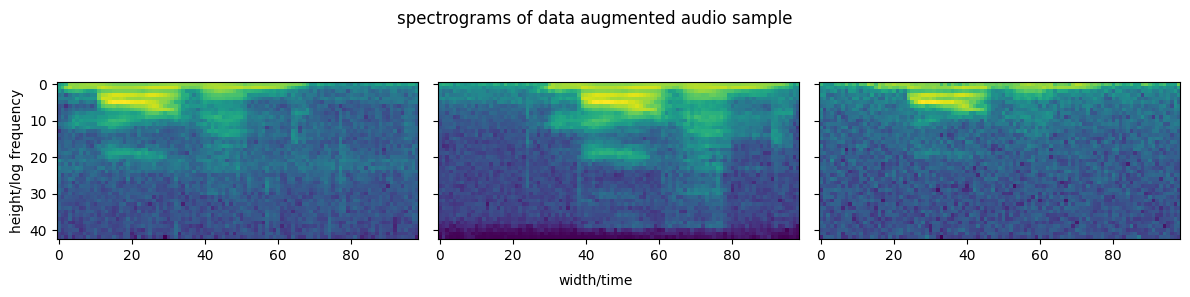

In [9]:
sample_audio_path='audio_data/marvin/0a9f9af7_nohash_1.wav'
fig,axes=plt.subplots(1,3,sharex=True,sharey=True,figsize=(12,2.8))
fig.suptitle('spectrograms of data augmented audio sample')
s=0.5
a=0.4
np.random.seed(5464)
audio_data=datagen._process_audio(sample_audio_path)
melspec=_create_melspec(audio_data)
im0=axes[0].imshow(melspec.T[0])
#fig.colorbar(im0, ax=axes[0])
axes[0].set_ylabel('height/log frequency')

np.random.seed(534)
audio_data=datagen._process_audio(sample_audio_path)
melspec=_create_melspec(audio_data)
axes[1].imshow(melspec.T[0])


np.random.seed(6456456)
audio_data=datagen._process_audio(sample_audio_path)
melspec=_create_melspec(audio_data)
axes[2].imshow(melspec.T[0])
fig.text(0.5, 0.001, 'width/time', ha='center')
plt.tight_layout()
plt.show()